# ALE plot with pyALE

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will create ALE plots with the open-source Python library [pyALE](https://pypi.org/project/PyALE/).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from PyALE import ale

## Load data

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50)

## Random Forest

In [4]:
# train model

rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=3,
    random_state=3,
).fit(X_train, y_train)

In [5]:
# R2 in train set

rf.score(X_train, y_train)

0.5662519439438518

In [6]:
# R2 in test set

rf.score(X_test, y_test)

0.5455953740118167

The model explains > 50% of the variability in the target.

## Feature importance

Let's determine the feature importance derived from the model.

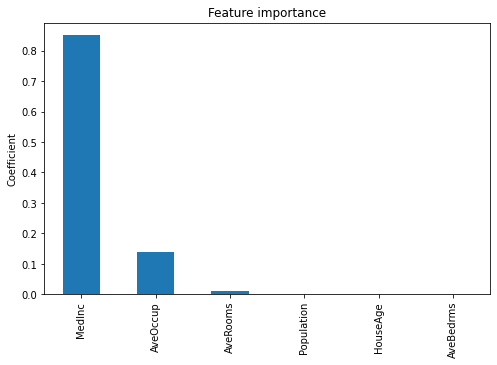

In [7]:
# put coefficients in a series

s = pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_,
)

# plot coefficients
s.sort_values(ascending=False).plot.bar(figsize=(8, 5))
plt.title("Feature importance")
plt.ylabel("Coefficient")
plt.show()

## ALE plot

PyALE._ALE_generic:INFO: Continuous feature detected.


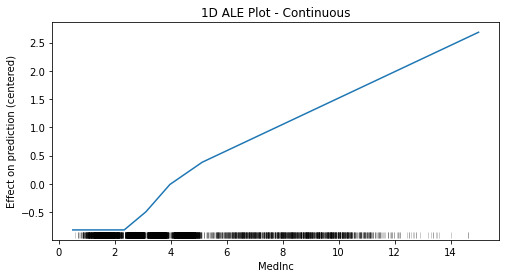

In [8]:
# 1D - continuous - no Confidence interval
ale_eff = ale(
    X=X_test, model=rf, feature=["MedInc"], grid_size=5, include_CI=False
)

PyALE._ALE_generic:INFO: Continuous feature detected.


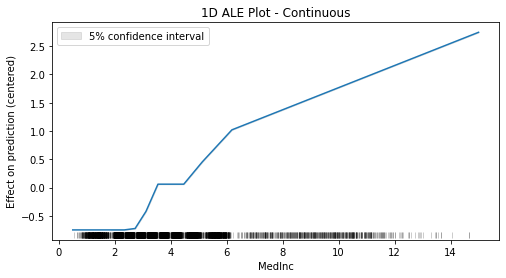

In [9]:
# 1D - continuous - with 95% Confidence interval

ale_eff = ale(
    X=X_test, model=rf, feature=["MedInc"], grid_size=10, include_CI=True, C=0.05,
)

The greater the number of intervals we examine, the more granular the ALE.

The confidence interval does not seem to work.

PyALE._ALE_generic:INFO: Continuous feature detected.


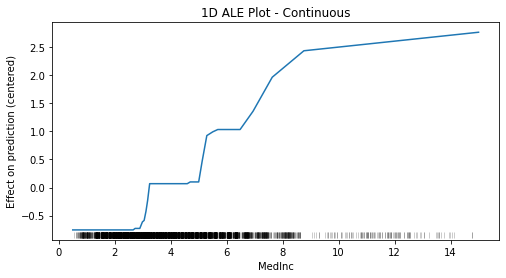

In [10]:
# 1D - continuous - no Confidence interval
# More intervals

ale_eff = ale(
    X=X_test, model=rf, feature=["MedInc"], grid_size=50, include_CI=False
)

Again, we see more granularity with a greater number of intervals.

PyALE._ALE_generic:INFO: Continuous feature detected.


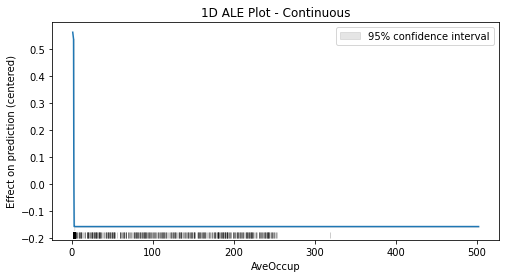

In [11]:
# Let's examine a less important feature

ale_eff = ale(
    X=X_test, model=rf, feature=["AveOccup"], grid_size=10, include_CI=True, C=0.95,
)

PyALE._ALE_generic:INFO: Continuous feature detected.


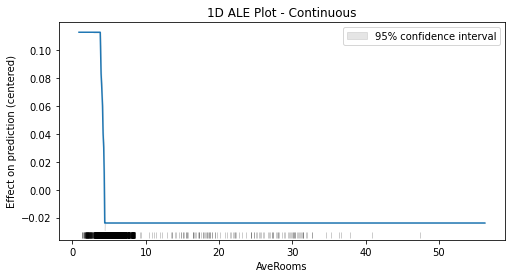

In [12]:
# Let's examine the third feature in terms of importance

ale_eff = ale(
    X=X_test, model=rf, feature=["AveRooms"], grid_size=50, include_CI=True, C=0.95,
)

This ALE plot tells us that as AveRooms increases, the price decreases. But the drop in price is smaller compared to the drop trigger by an increase in the variable AveOccup.

PyALE._ALE_generic:INFO: Continuous feature detected.


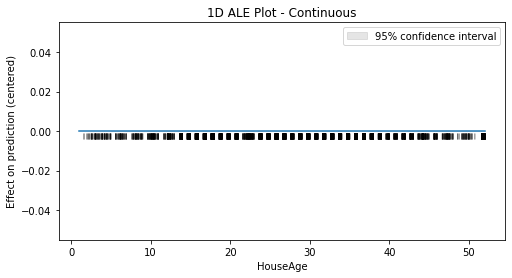

In [13]:
# Let's examine a feature that is not used by the tree:

ale_eff = ale(
    X=X_test, model=rf, feature=["HouseAge"], grid_size=50, include_CI=True, C=0.95,
)

As expected, increasing values of HouseAge do not change the house sales price.